# 6 - Mohammad Hosein Ashoori
## 97149068

In [47]:
import pandas as pd
from sklearn import preprocessing, decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix
import scipy.stats as stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
matplotlib.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


# 1 - Decision Tree Classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

In [4]:
penguins = pd.read_csv("files/penguins.csv")
display(penguins.head())
penguins.info()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 1-1 - Remove Missing Values

In [5]:
penguins_nonNull = penguins.dropna()
penguins_nonNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


## 1-2 - Split Data Into Test and Train

In [72]:
penguins_nonNull_normal= penguins_nonNull[:]
encoder = preprocessing.OrdinalEncoder()
penguins_nonNull_normal.insert( 0, 'normal_species' ,encoder.fit_transform(penguins_nonNull_normal[['species']]))
species = penguins_nonNull_normal['species'].unique()
penguins_nonNull_normal.insert( 0, 'normal_island' ,encoder.fit_transform(penguins_nonNull_normal[['island']]))
penguins_nonNull_normal.insert( 0, 'normal_sex' ,encoder.fit_transform(penguins_nonNull_normal[['sex']]))
penguins_nonNull_normal=penguins_nonNull_normal.drop(['species','island','sex'],axis=1)

penguins_X = penguins_nonNull_normal.drop(['normal_species'], axis=1)
penguins_y = penguins_nonNull_normal['normal_species']
X_Train, X_Test, y_Train, y_Test = train_test_split(penguins_X, penguins_y, test_size=0.2,shuffle=True)
display(X_Train.head())
display(X_Test.head())
display(y_Train.head())
display(y_Test.head())

,normal_sex,normal_island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
205,1.0,1.0,50.7,19.7,203.0,4050.0
37,0.0,1.0,42.2,18.5,180.0,3550.0
38,0.0,1.0,37.6,19.3,181.0,3300.0
100,0.0,0.0,35.0,17.9,192.0,3725.0
45,1.0,1.0,39.6,18.8,190.0,4600.0


,normal_sex,normal_island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
141,1.0,1.0,40.6,17.2,187.0,3475.0
74,0.0,2.0,35.5,17.5,190.0,3700.0
111,1.0,0.0,45.6,20.3,191.0,4600.0
306,0.0,0.0,43.4,14.4,218.0,4600.0
245,1.0,0.0,46.1,15.1,215.0,5100.0


205    1.0
37     0.0
38     0.0
100    0.0
45     0.0
Name: normal_species, dtype: float64

141    0.0
74     0.0
111    0.0
306    2.0
245    2.0
Name: normal_species, dtype: float64

## 1-3 - Make a Decision With a Tree :)

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_Train, y_Train)
clf.score(X_Test, y_Test)

1.0

## 1-4 - Confution Matrix 

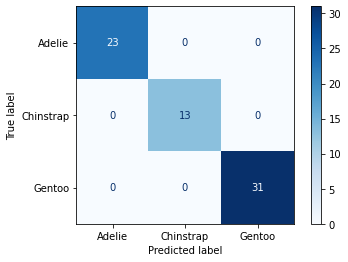

In [80]:
plot_confusion_matrix(clf, X_Test, y_Test,display_labels=species, cmap='Blues')

In [81]:
prediction_dtree = clf.predict(X_Test)
result = classification_report(y_Test ,prediction_dtree,output_dict=True)
display(result)

{'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23},
 '1.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13},
 '2.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 31},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 67},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 67}}

## 1-5 - Plot Tree

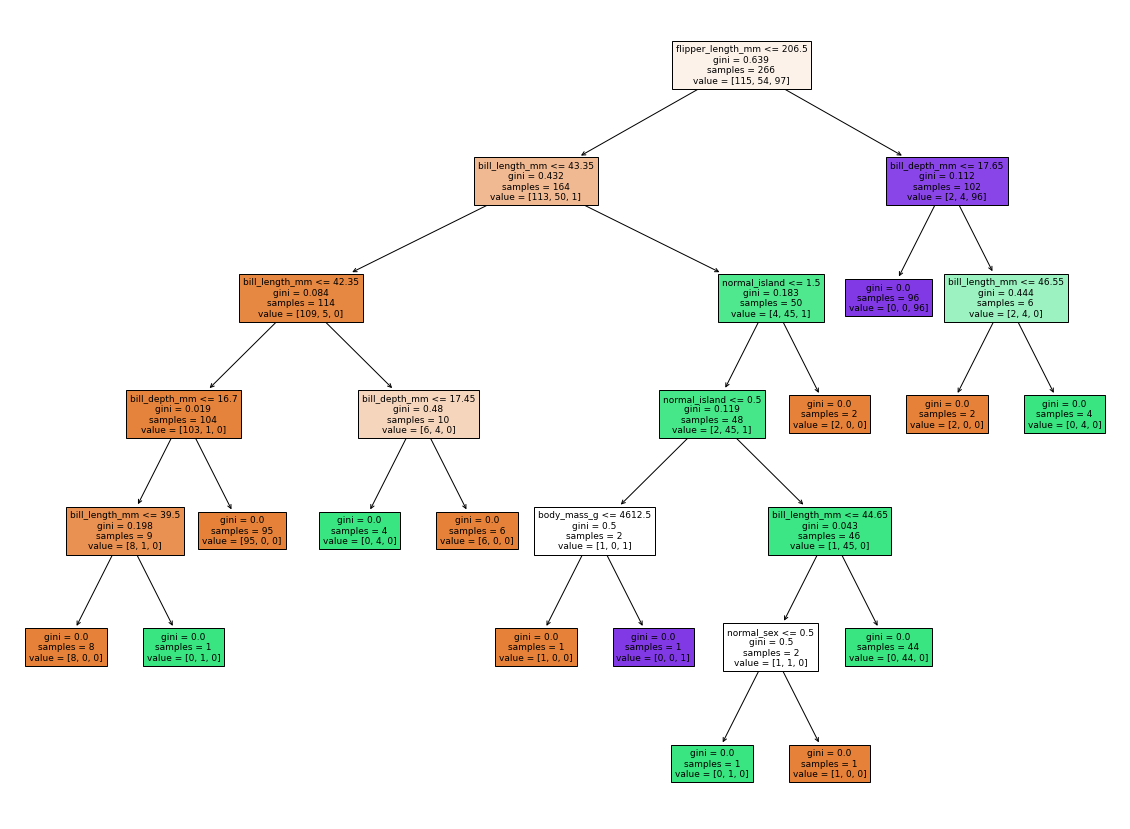

In [112]:

# plot tree
fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(clf, feature_names=penguins_X.columns, filled=True,fontsize=9,ax=ax)
plt.savefig('files/penguins_tree.png')


# 2 - SVM

In [10]:
from sklearn.svm import SVC

In [11]:
bill = pd.read_csv("files/bill_authentication.csv")
display(bill.head())
bill.info()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## 2-1 - Split Data Into Test and Train

In [12]:
bill_nonNull = bill.dropna()
bill_X = bill_nonNull.drop(['Class'], axis=1)
bill_y = bill_nonNull['Class']
bill_X_Train, bill_X_Test, bill_y_Train, bill_y_Test = train_test_split(bill_X, bill_y, test_size=0.2,shuffle=True)

## 2-2 - Useing SVM to Classify Data

In [13]:
svc = SVC(kernel='linear')
svc.fit(bill_X_Train, bill_y_Train)

SVC(kernel='linear')

## 2-3 - Confution Matrix 

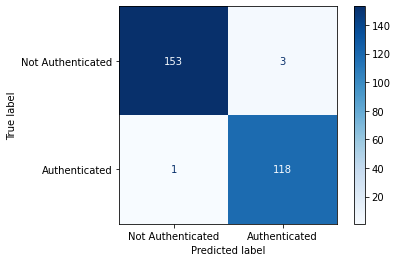

In [63]:
plot_confusion_matrix(svc, bill_X_Test, bill_y_Test, display_labels=['Not Authenticated','Authenticated'], cmap='Blues')

In [65]:
prediction_svc = svc.predict(bill_X_Test)
result = classification_report(bill_y_Test ,prediction_svc,output_dict=True)
display(result)

{'0': {'precision': 0.9935064935064936,
  'recall': 0.9807692307692307,
  'f1-score': 0.9870967741935484,
  'support': 156},
 '1': {'precision': 0.9752066115702479,
  'recall': 0.9915966386554622,
  'f1-score': 0.9833333333333334,
  'support': 119},
 'accuracy': 0.9854545454545455,
 'macro avg': {'precision': 0.9843565525383707,
  'recall': 0.9861829347123465,
  'f1-score': 0.9852150537634409,
  'support': 275},
 'weighted avg': {'precision': 0.985587635504991,
  'recall': 0.9854545454545455,
  'f1-score': 0.9854682306940371,
  'support': 275}}

## 2-4 - SVM NonLinear (Gaussian Kernel)

In [15]:
svc_gk = SVC(kernel='rbf')
svc_gk.fit(bill_X_Train, bill_y_Train)

SVC()

## 2-5 - Confution Matrix 

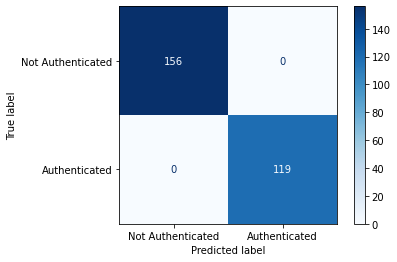

In [53]:
plot_confusion_matrix(svc_gk, bill_X_Test, bill_y_Test, display_labels=['Not Authenticated','Authenticated'], cmap='Blues')

In [64]:
prediction_svc_gk = svc_gk.predict(bill_X_Test)
result = classification_report(bill_y_Test ,prediction_svc_gk,output_dict=True)
display(result)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 156},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 119},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 275},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 275}}

# 3 - Neural Network

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
bill = pd.read_csv("files/bill_authentication.csv")
display(bill.head())
bill.info()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## 3-1 - Split Data Into Train and Test

In [19]:
bill_nonNull = bill.dropna()
bill_X = bill_nonNull.drop(['Class'], axis=1)
bill_y = bill_nonNull['Class']
bill_X_Train, bill_X_Test, bill_y_Train, bill_y_Test = train_test_split(bill_X, bill_y, test_size=0.2,shuffle=True)

## 3-2 - Classify Data With MLP

In [51]:
bill_MLP = MLPClassifier(hidden_layer_sizes=(), random_state=1)
bill_MLP.fit(bill_X_Train, bill_y_Train)

MLPClassifier(hidden_layer_sizes=2, random_state=1)

## 3-3 - Confution Matrix 

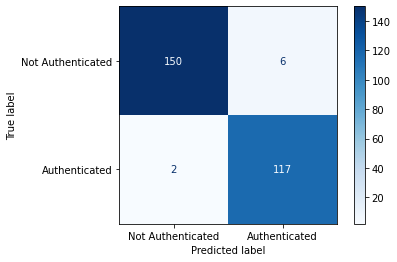

In [52]:
plot_confusion_matrix(bill_MLP, bill_X_Test, bill_y_Test, display_labels=['Not Authenticated','Authenticated'], cmap='Blues')

In [62]:
prediction_MLP = bill_MLP.predict(bill_X_Test)
result = classification_report(bill_y_Test ,prediction_MLP,output_dict=True)
display(result)

{'0': {'precision': 0.9868421052631579,
  'recall': 0.9615384615384616,
  'f1-score': 0.974025974025974,
  'support': 156},
 '1': {'precision': 0.9512195121951219,
  'recall': 0.9831932773109243,
  'f1-score': 0.9669421487603305,
  'support': 119},
 'accuracy': 0.9709090909090909,
 'macro avg': {'precision': 0.9690308087291399,
  'recall': 0.9723658694246929,
  'f1-score': 0.9704840613931522,
  'support': 275},
 'weighted avg': {'precision': 0.9714272377173533,
  'recall': 0.9709090909090909,
  'f1-score': 0.9709606096382954,
  'support': 275}}

## 3-4 Train MLP 

In [86]:
errors = []
for l in range(2,20):
    bill_MLP = MLPClassifier(hidden_layer_sizes=(l))
    bill_MLP.fit(bill_X_Train, bill_y_Train)
    prediction_MLP = bill_MLP.predict(bill_X_Test)
    result = classification_report(bill_y_Test ,prediction_MLP,output_dict=True)
    errors.append(result['weighted avg']['f1-score'])

Text(0, 0.5, 'Accuracy')

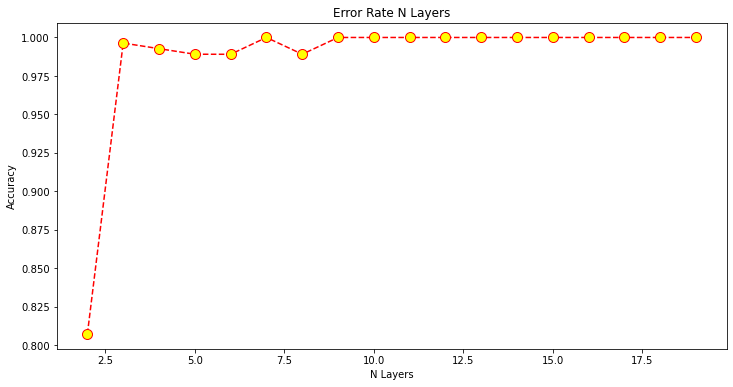

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 20), errors, color='red', linestyle='--', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate N Layers')
plt.xlabel('N Layers')
plt.ylabel('Accuracy')

## 3-5 Visualize Neural Network

In [24]:
# This Libraray is modified based the work by Milo Spencer-Harper and Oli Blum, https://stackoverflow.com/a/37366154/10404826
# On top of that, I added support for showing weights (linewidth, colors, etc.)
# Contributor: Jianzheng Liu
# Contact: jzliu.100@gmail.com

from matplotlib import pyplot
from math import cos, sin, atan
from palettable.tableau import Tableau_10
from time import localtime, strftime
import numpy as np

class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius, id=-1):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)
        pyplot.gca().text(self.x, self.y-0.15, str(id), size=10, ha='center')

class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, weight=0.4, textoverlaphandler=None):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)

        # assign colors to lines depending on the sign of the weight
        color=Tableau_10.mpl_colors[0]
        if weight > 0: color=Tableau_10.mpl_colors[1]

        # assign different linewidths to lines depending on the size of the weight
        abs_weight = abs(weight)        
        if abs_weight > 0.5: 
            linewidth = 10*abs_weight
        elif abs_weight > 0.8: 
            linewidth =  100*abs_weight
        else:
            linewidth = abs_weight

        # draw the weights and adjust the labels of weights to avoid overlapping
        if abs_weight > 0.5: 
            # while loop to determine the optimal locaton for text lables to avoid overlapping
            index_step = 2
            num_segments = 10   
            txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
            txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments
            while ((not textoverlaphandler.getspace([txt_x_pos-0.5, txt_y_pos-0.5, txt_x_pos+0.5, txt_y_pos+0.5])) and index_step < num_segments):
                index_step = index_step + 1
                txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
                txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments

            # print("Label positions: ", "{:.2f}".format(txt_x_pos), "{:.2f}".format(txt_y_pos), "{:3.2f}".format(weight))
            a=pyplot.gca().text(txt_x_pos, txt_y_pos, "{:3.2f}".format(weight), size=8, ha='center')
            a.set_bbox(dict(facecolor='white', alpha=0))
            # print(a.get_bbox_patch().get_height())

        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment), linewidth=linewidth, color=color)
        pyplot.gca().add_line(line)

    def draw(self, layerType=0, weights=None, textoverlaphandler=None):
        j=0 # index for neurons in this layer
        for neuron in self.neurons:            
            i=0 # index for neurons in previous layer
            neuron.draw( self.neuron_radius, id=j+1 )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weights[i,j], textoverlaphandler)
                    i=i+1
            j=j+1
        
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

# A class to handle Text Overlapping
# The idea is to first create a grid space, if a grid is already occupied, then
# the grid is not available for text labels.
class TextOverlappingHandler():
    # initialize the class with the width and height of the plot area
    def __init__(self, width, height, grid_size=0.2):
        self.grid_size = grid_size
        self.cells = np.ones((int(np.ceil(width / grid_size)), int(np.ceil(height / grid_size))), dtype=bool)

    # input test_coordinates(bottom left and top right), 
    # getspace will tell you whether a text label can be put in the test coordinates
    def getspace(self, test_coordinates):
        x_left_pos = int(np.floor(test_coordinates[0]/self.grid_size))
        y_botttom_pos = int(np.floor(test_coordinates[1]/self.grid_size))
        x_right_pos = int(np.floor(test_coordinates[2]/self.grid_size))
        y_top_pos = int(np.floor(test_coordinates[3]/self.grid_size))
        if self.cells[x_left_pos, y_botttom_pos] and self.cells[x_left_pos, y_top_pos] \
        and self.cells[x_right_pos, y_top_pos] and self.cells[x_right_pos, y_botttom_pos]:
            for i in range(x_left_pos, x_right_pos):
                for j in range(y_botttom_pos, y_top_pos):
                    self.cells[i, j] = False

            return True
        else:
            return False

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self, weights_list=None):
        # vertical_distance_between_layers and horizontal_distance_between_neurons are the same with the variables of the same name in layer class
        vertical_distance_between_layers = 6
        horizontal_distance_between_neurons = 2
        overlaphandler = TextOverlappingHandler(\
            self.number_of_neurons_in_widest_layer*horizontal_distance_between_neurons,\
            len(self.layers)*vertical_distance_between_layers, grid_size=0.2 )

        pyplot.figure(figsize=(12, 9))
        for i in range( len(self.layers) ):
            layer = self.layers[i]                                
            if i == 0:
                layer.draw( layerType=0 )
            elif i == len(self.layers)-1:
                layer.draw( layerType=-1, weights=weights_list[i-1], textoverlaphandler=overlaphandler)
            else:
                layer.draw( layerType=i, weights=weights_list[i-1], textoverlaphandler=overlaphandler)

        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        figureName='ANN_'+strftime("%Y%m%d_%H%M%S", localtime())+'.png'
        pyplot.savefig(figureName, dpi=300, bbox_inches="tight")
        pyplot.show()

class DrawNN():
    # para: neural_network is an array of the number of neurons 
    # from input layer to output layer, e.g., a neural network of 5 nerons in the input layer, 
    # 10 neurons in the hidden layer 1 and 1 neuron in the output layer is [5, 10, 1]
    # para: weights_list (optional) is the output weights list of a neural network which can be obtained via classifier.coefs_
    def __init__( self, neural_network, weights_list=None ):
        self.neural_network = neural_network
        self.weights_list = weights_list
        # if weights_list is none, then create a uniform list to fill the weights_list
        if weights_list is None:
            weights_list=[]
            for first, second in zip(neural_network, neural_network[1:]):
                tempArr = np.ones((first, second))*0.4
                weights_list.append(tempArr)
            self.weights_list = weights_list
        
    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw(self.weights_list)

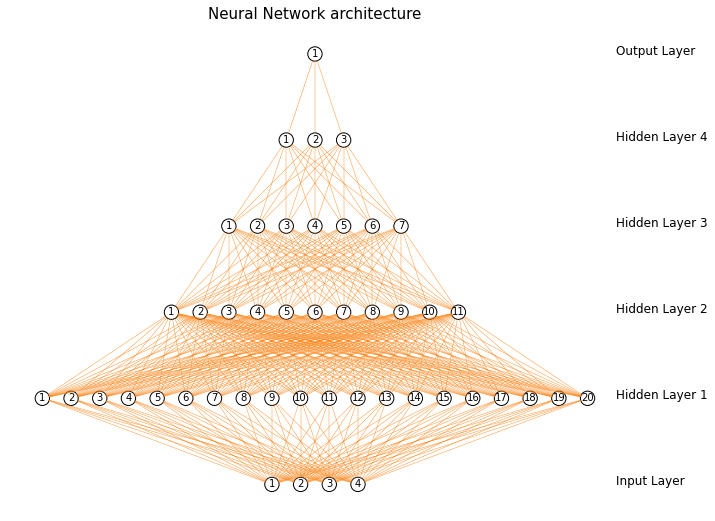

In [116]:
bill_MLP_vis = MLPClassifier(hidden_layer_sizes=(20,11,7,3))
bill_MLP_vis.fit(bill_X_Train, bill_y_Train)
network_structure = np.hstack(([bill_X.shape[1]], np.asarray(bill_MLP_vis.hidden_layer_sizes), [1]))
# # Draw the Neural Network with weights
# network=DrawNN(network_structure, bill_MLP_vis.coefs_)
# network.draw()

# Draw the Neural Network without weights
network=DrawNN(network_structure)
network.draw()